<a href="https://colab.research.google.com/github/cjfghk5697/deeplearnig_practice/blob/main/softmax.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>3층 신경망 구현하기</h1>

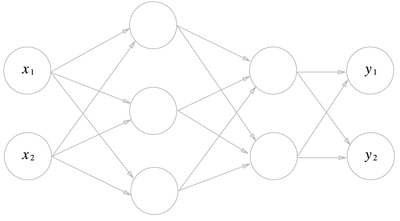
<br>
그림1 3층 신경망<br>
3층 신경망 처리하기전 표기법을 공부해보겠다.

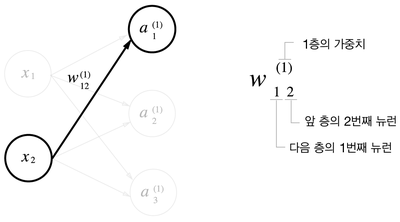
<br> 그림2 표기법
<br>
우측 상단(1)은 가중치. 이는 1층의 가중치 1층의 뉴런임을 뜻한다. 또, 가중치의 오른쪽 아래 의 두 숫자는 차례로 다음 층 뉴런과 앞 층 뉴런의 인덱스 번호이다.
즉 w(1) 1 2은 앞층의 2번째 뉴런 x2에서 다음층의 첫번째 뉴런으로 향할 때의 가중치를 의미한다. 가중치 오른쪽 아래의 인덱스 번호는 '다음층 번호, 앞 층 번호' 순으로 적는다.

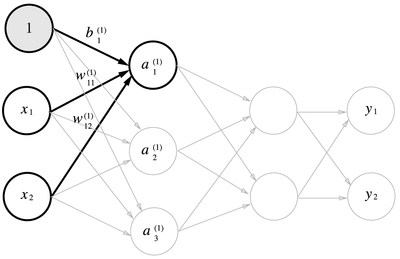


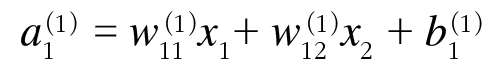

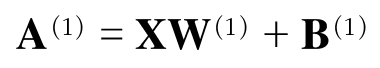

위처럼 수식을 간소화시킬수 있다. 계산은 꼭 한번씩 해보길 바란다. 이제 구현을 해보겠다.


In [8]:
import numpy as np


def sigmoid(x):
  return 1/(1+np.exp(-x))

X=np.array([1.0, 0.5])
W1= np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1= np.array([0.1,0.2,0.3])

print(W1.shape)
print(X.shape)
print(B1.shape)

A1=np.dot(X,W1)+B1
Z1=sigmoid(A1)

print(A1)
print(Z1)

(2, 3)
(2,)
(3,)
[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


시그모이드 함수로 활성화 했다.<br>

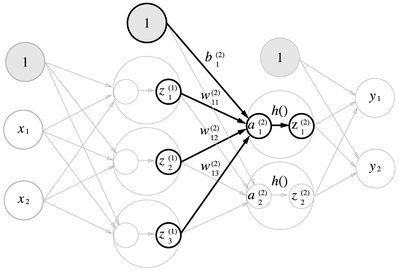
<br>
이제는 3층 신경망 2층으로 가는 과정을 구현하겠다.

In [9]:
W2= np.array([[0.1,0.4], [0.2,0.5], [0.3,0.6]])
B2= np.array([0.1,0.2])

print(Z1.shape)
print(W2.shape)
print(B2.shape)

A2=np.dot(Z1,W2)+B2
Z2=sigmoid(A2)

(3,)
(3, 2)
(2,)


Z1이 2층의 입력이 된다는 점을 제외하면 구현이 똑같다. 이제는 마지막으로 2층에서 출력층으로 신호 전달이다. 딱 하나, 활성화 함수만 지금까지의 은닉층과 다르다.

In [10]:
def identity_function(x):
  return x
W3= np.array([[0.1,0.3],[0.2,0.4]])
B3= np.array([0.1,0.2])

A3= np.dot(Z2,W3)+B3
Y=identity_function(A3)

항등 함수인 identity_function()을 정의하고 이를 충력층의 활성화 함수로 활용했다. 입력 그대로 출력하는 함수이다. 출력층에서는 활성화함수를 시그마로 표시한다. 은닉층의 활성화 함수 h()와는 다르다.

In [13]:
def init_network():
  network={}
  network['W1']=np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]])
  network['b1']=np.array([0.1,0.2,0.3])
  network['W2']=np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]])
  network['b2']=np.array([0.1,0.2])
  network['W3']=np.array([[0.1,0.3],[0.2,0.4]])
  network['b3']=np.array([0.1,0.2])

  return network

def forward(network, x):
  W1,W2,W3=network['W1'], network['W2'], network['W3']
  b1,b2,b3=network['b1'], network['b2'], network['b3']
  
  a1=np.dot(x,W1) +b1
  z1= sigmoid(a1)
  a2= np.dot(z1,W2)+b2
  z2=sigmoid(a2)
  a3= np.dot(z2,W3)+b3
  y= identity_function(a3)

  return y
network=init_network()
x=np.array([1.0,0.5])
y=forward(network,x)
print(y)

[0.31682708 0.69627909]


init_network는 가중치와 편향을 초기와하고 딕셔너리 변수인 network에 저장한다. network에는 각 층에 피룡한 매개변수를 저장한다. <br>그리고 forward 함수는 입력 신호를 출력으로 변환하는 처리 과정을 모두 구현하고 있다. <br>함수의 이름을 forward라 한 것은 순방향으로 나아가기 때문이고 나중에 역방향 backward도 살펴볼 것이다. 
<hr>

<h1>출력층 설계하기</h1>
신경망은 분류와 회귀 모두에 이용할 수 있다. 다만 둘 중 어떤 문제냐에 따라 출력층에서 사용하는 활성화 함수가 달라진다. 일반적으로 회귀에는 항등 함수를, 분류에는 소프트맥스 함수를 사용한다.

<h2> 항등 함수와 소프트맥스 함수 구현하기</h2>
항등 함수는 입력을 그대로 출력한다.<br>

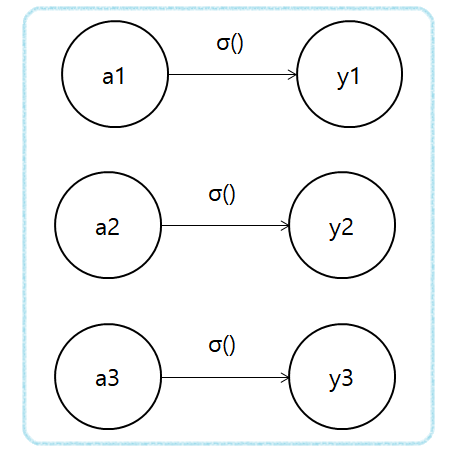
<br>
소프트맥스 함수의 식은 다음과 같다.

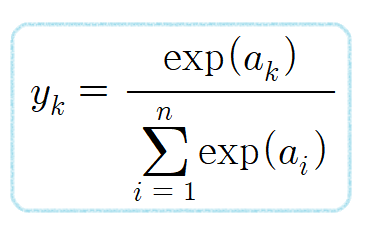

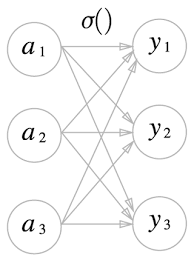

<br>
소프트 맥스는 모든 입력신호로부터 화살표를 받는다. 출력층의 각 뉴런이 모든 입력 신호에서 영향을 받기 때문이다.

In [ ]:
def softmax(a):
  exp_a=np.exp(a)
  sum_exp_a=np.sum(exp_a)
  y=exp_a/sum_exp_a
  return y
  

softmax는 컴퓨터로 계산할때 엄청난 결함이 있다. 바로 오버플로 문제이다. 소프트맥스 함수는 지수 함수를 사용하는데, 지수 함수란 것이 쉽게 아주 큰 값을 내뱉는다.그래서 소프트맥스 함수를 log형으로 만들어 지수에 대한 부담을 줄인다.

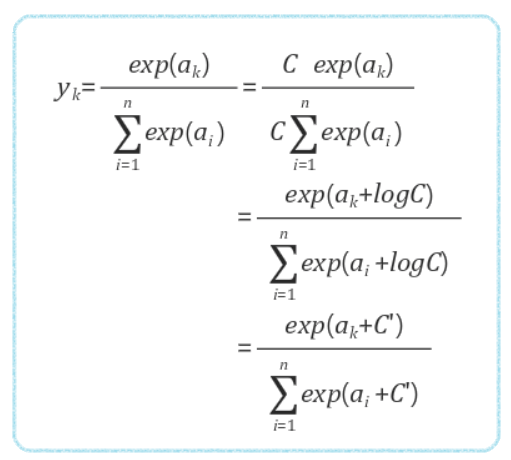

In [14]:
def softmax(a):
  c=np.max(a)
  exp_a=np.exp(a-c) #오버플로 대책
  sum_exp_a=np.sum(exp_a)
  y=exp_a/sum_exp_a

  return y

In [15]:
a=np.array([0.3,2.9,4.0])
y=softmax(a)
print(y)
print(np.sum(y))

[0.01821127 0.24519181 0.73659691]
1.0


소프트맥스 함수의 출력은 0에서 1.0 사이의 실수이다. 또 소프트 맥스 함수 출력의 총합은 1이다. 이성질 덕분에 소프트맥스 함수의 출력을 '확률'로 해석할 수 있다.<br>
하지만 소프트맥스 함수를 적용해도 각 원소의 대소관계는 바뀌지 않는다. 이유는 y=exp(x)가 단조 증가 함수이기 때문이다. 결과적으로 있든 없든 결과는 같기 때문에 소프트맥스 함수는 생략하는 것이 일반적이다.
<hr>
<h1>출력층의 뉴런 수 정하기</h1>
출력층의 뉴런 수는 풀려는 문제에 맞게 적절히 정해야한다. 분류에서는 분류하고 싶은 클래스 수로 설정하는 것이 일반적이다. 예를 들어 입력 이미지를 숫자 0부터 9 중 하나로 분류하는 분제라면 출력층의 뉴런을 10개로 설정한다.